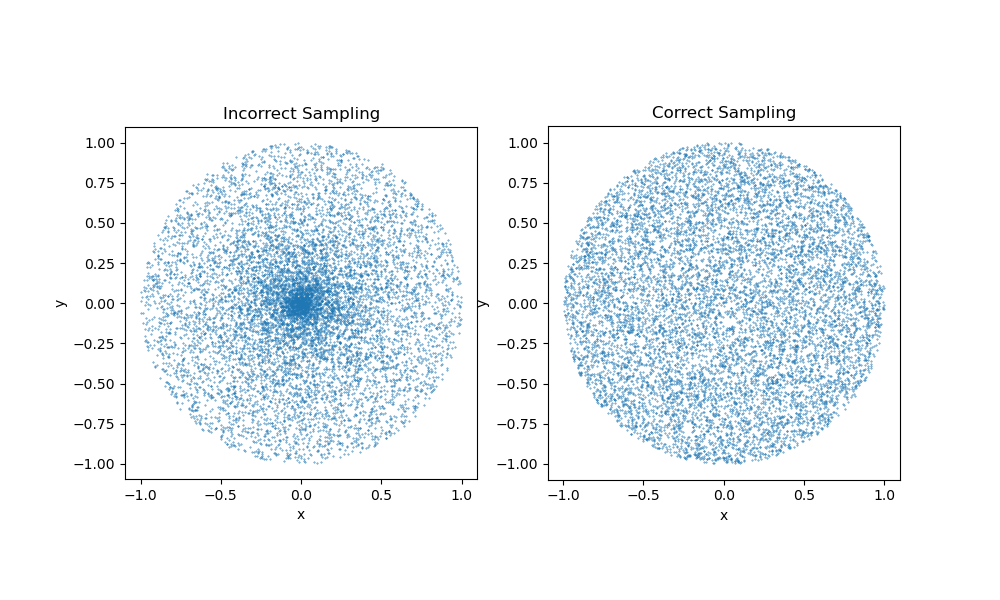

In [37]:
# surface_sampling_circle.py

# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random


def plot_incorrect(ax):

    num_samples = 10000 #10,000 random numbers

    v = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    r = random.rand(num_samples) #10,000 random nums between 0 and 1

    x = r * np.cos(v) #standard cartesian variables expressed in polar
    y = r * np.sin(v)

    pixel_size = (72 / ax.figure.dpi) ** 2 #dots are the size of pixels
    ax.scatter(x, y, marker=".", s=pixel_size)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal") #so image isn't distorted


def plot_correct(ax):
    num_samples = 10000

    v = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    r = random.rand(num_samples)

    x = r**(1/2) * np.cos(v)
    #The area element in polar coordinates has an r in front of it. Dots get evenly distributed in these 
    #area segments, which are really the area elements. A segment/element where r is small is smaller than 
    # a segment/element where r is big, however the computer places roughly the same number of dots in all 
    #segments/elements. Segments near the origin are smaller and end up having a higher density of dots. 
    #We counteract this effect by taking the square root of r in x and y expressions.
    
    #There is a part I don't fully understand. If the area element is multiplied by r, and taking the square
    #root of r in the x and y expressions works, to me this implies that the area element is a product of x, 
    #y, and r. 
    
    y = r**(1/2) * np.sin(v)

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x, y, marker=".", s=pixel_size)

    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def main():
    plt.close("all")
    fig = plt.figure(" ")
    fig.set_size_inches(10, 6)

    gs = fig.add_gridspec(1, 2)

    ax = fig.add_subplot(gs[0, 0])
    plot_incorrect(ax)

    ax = fig.add_subplot(gs[0, 1])
    plot_correct(ax)

    plt.show()


main()

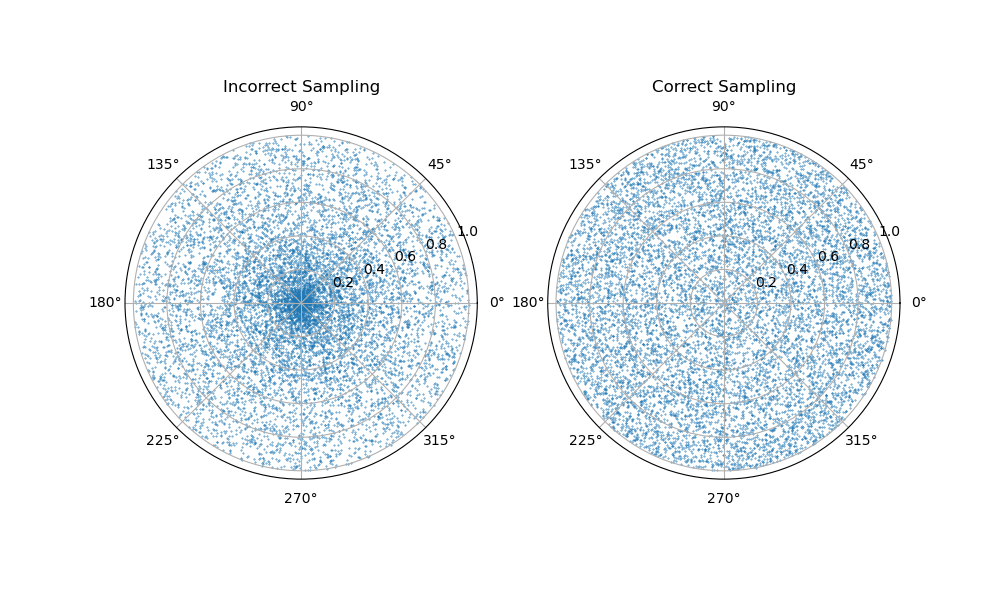

In [44]:
# surface_sampling_circle.py

# Cell 2

%matplotlib widget
def plot_incorrect(ax):
    num_samples = 10000

    v = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    r = random.rand(num_samples)
    #not even bothering with conversion to cartesian, doing a direct polar plot instead

    pixel_size = (72 / ax.figure.dpi) ** 2
    
    ax.scatter(v, r, marker=".", s=pixel_size)

    ax.set_title("Incorrect Sampling")


    ax.set_aspect("equal")

def plot_correct(ax):
    num_samples = 10000

    v = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    r = random.rand(num_samples)

    pixel_size = (72 / ax.figure.dpi) ** 2
    
    ax.scatter(v, r**(1/2), marker=".", s=pixel_size)
    #yes, still need to take the square root of r for an even distribution.

    ax.set_title("Correct Sampling")


    ax.set_aspect("equal")


def main():
    plt.close("all")
    
    fig = plt.figure(' ')
    
    fig.set_size_inches(10, 6)
    gs = fig.add_gridspec(1, 2)
    
    ax = fig.add_subplot(gs[0, 0], projection='polar')
    plot_incorrect(ax)
    
    ax = fig.add_subplot(gs[0, 1], projection='polar')
    plot_correct(ax)

    plt.show()


main()

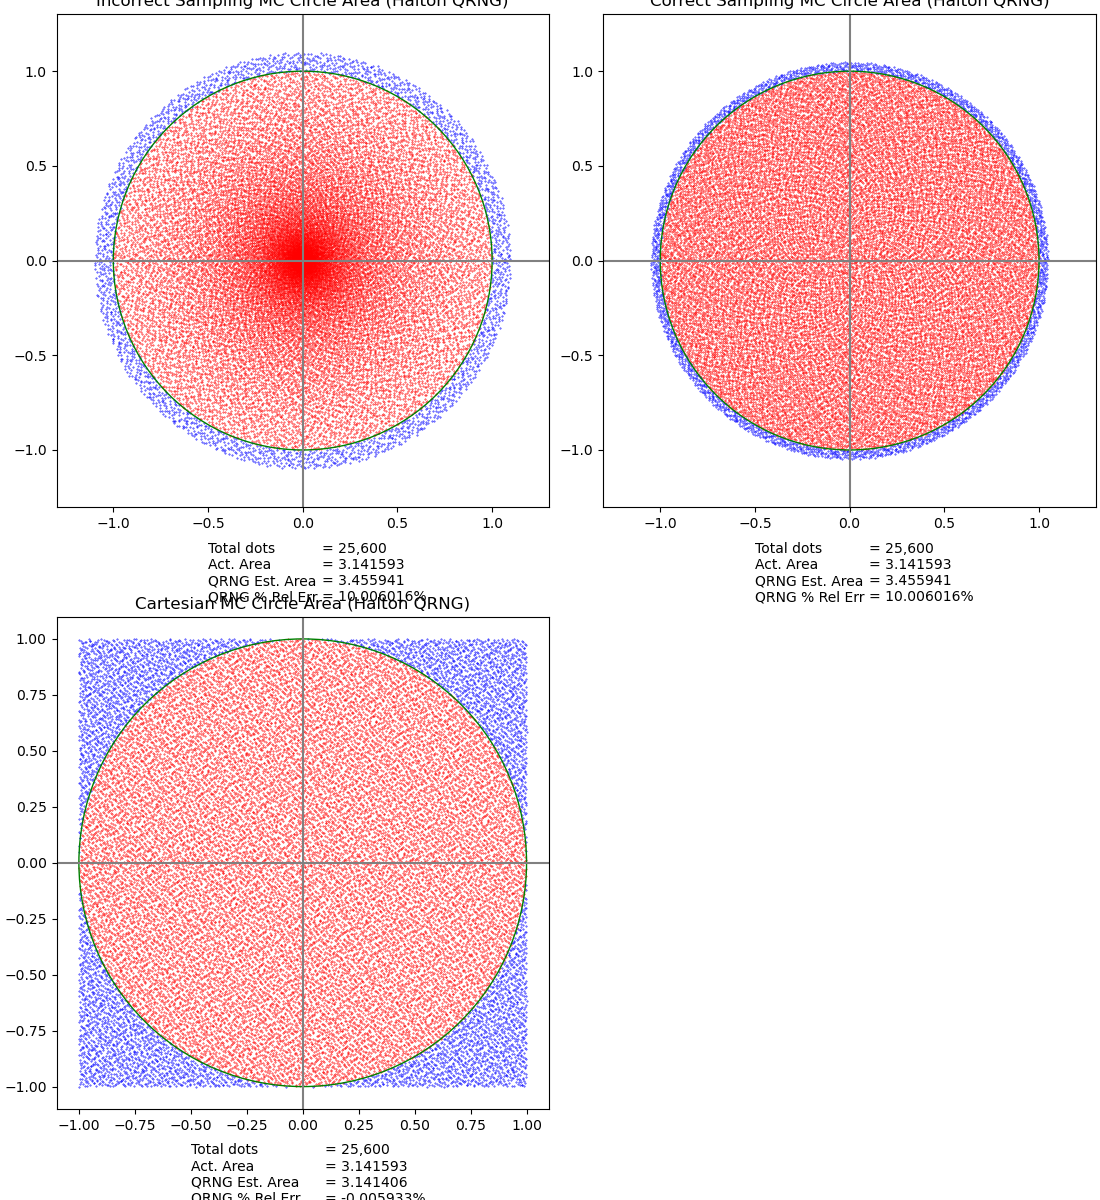

In [46]:
# surface_sampling_circle.py

# Cell 3

from matplotlib.patches import Circle
from numba import float64, int32, vectorize
#from numpy.random import default_rng

@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p):
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_qrng_incorrect(ax, r, phi, iterations):
    
    x = r * np.cos(phi) #convert x to polar
    y = r * np.sin(phi) #convert y to polar

    d = x**2 + y**2 #standard distance or radius formula. 

    x_in = x[d <= 1.0] #inside unit circle
    y_in = y[d <= 1.0]

    x_out = x[d > 1.0] #outside unit circle
    y_out = y[d > 1.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    ax.add_patch(Circle((0, 0), radius=1.0, color="green", fill=False))

    est_area = np.count_nonzero(d <= 1.0) / iterations * (np.pi * (1.1**2)) #the area is 1.1 * pi
    act_area = np.pi
    err = (est_area - act_area) / act_area

    ax.set_title("Incorrect Sampling MC Circle Area (Halton QRNG)")
    ax.set_xlim((-1.3, 1.3))
    ax.set_ylim((-1.3, 1.3))
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.set_aspect("equal")

    ax.text(
        -0.50,
        -1.8,
        "Total dots\nAct. Area\n" "QRNG Est. Area\nQRNG % Rel Err",
        ha="left",
    )

    ax.text(
        0.10,
        -1.8,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )
    
def plot_qrng_correct(ax, r, phi, iterations):
    
    x = r**(1/2) * np.cos(phi) #cartesian conversion. Here I am accounting for uneven sampling. Does this
    #have an effect on the accuracy of the MC estimation?
    y = r**(1/2) * np.sin(phi)

    d = x**2 + y**2

    x_in = x[d <= 1.0]
    y_in = y[d <= 1.0]

    x_out = x[d > 1.0]
    y_out = y[d > 1.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    ax.add_patch(Circle((0, 0), radius=1.0, color="green", fill=False))

    est_area = np.count_nonzero(d <= 1.0) / iterations * (np.pi * (1.1**2))
    act_area = np.pi
    err = (est_area - act_area) / act_area

    ax.set_title("Correct Sampling MC Circle Area (Halton QRNG)")
    ax.set_xlim((-1.3, 1.3))
    ax.set_ylim((-1.3, 1.3))
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.set_aspect("equal")

    ax.text(
        -0.50,
        -1.8,
        "Total dots\nAct. Area\n" "QRNG Est. Area\nQRNG % Rel Err",
        ha="left",
    )

    ax.text(
        0.10,
        -1.8,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )

def plot_cart_qrng(ax, iterations, primes):
    x = halton(np.arange(iterations), primes[0]) * 2 - 1
    
    y = halton(np.arange(iterations), primes[1]) * 2 - 1

    d = x**2 + y**2

    x_in = x[d <= 1.0]
    y_in = y[d <= 1.0]

    x_out = x[d > 1.0]
    y_out = y[d > 1.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    ax.add_patch(Circle((0, 0), radius=1.0, color="green", fill=False))

    est_area = np.count_nonzero(d <= 1.0) / iterations * 4
    act_area = np.pi
    err = (est_area - act_area) / act_area

    ax.set_title("Cartesian MC Circle Area (Halton QRNG)")
    ax.set_xlim((-1.1, 1.1))
    ax.set_ylim((-1.1, 1.1))
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.set_aspect("equal")

    ax.text(
        -0.50,
        -1.52,
        "Total dots\nAct. Area\n" "QRNG Est. Area\nQRNG % Rel Err",
        ha="left",
    )

    ax.text(
        0.10,
        -1.52,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )
    
def main():
    iterations_sqrt = 160
    iterations = iterations_sqrt**2 #25600 samplings
    primes = [2, 3]

    r = halton(np.arange(iterations), primes[0]) * 1.1 #biggest possible radius is 1.1
    #This MC estimation is better than the equivalent one that was shown to us
    #in mc_circle_qrng.ipynb. Although the range of radii is not much bigger than 1. The estimation gets
    #worse as the range of r's increases.
    
    #Sampling (correct/incorrect) has no effect on MC estimation.
    phi = halton(np.arange(iterations), primes[1]) * 2 *np.pi #generate phis via halton
    
    plt.close("all")
    fig = plt.figure(label=" ", constrained_layout=True)
    fig.set_size_inches(11, 12)
    gs = fig.add_gridspec(2, 2)

    ax = fig.add_subplot(gs[0, 0])
    plot_qrng_incorrect(ax, r, phi, iterations)

    ax = fig.add_subplot(gs[0, 1])
    plot_qrng_correct(ax, r, phi, iterations)
    
    ax = fig.add_subplot(gs[1, 0])
    plot_cart_qrng(ax, iterations, primes)

    plt.show()


main()